# Comparing RNN vs LSTM vs GRU

In [1]:
# Standard Math / Data libraries
import numpy as np
import pandas as pd

# Data Scrape Package
import pandas_datareader.data as web

# Plotting package
import matplotlib.pyplot as plt
# Scaling Package
from sklearn.preprocessing import MinMaxScaler

# Keras Network @ https://www.tensorflow.org/guide/keras/rnn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set Random seed
import random
random.seed(2505)

# Larger pictures
plt.rcParams["figure.figsize"] = (20,10)

# Cleaning the Data

In [6]:
from google.colab import drive
# Mount Google Drive
#drive.mount('/content/drive')

# Path ke file di Google Drive (ganti sesuai lokasi file kamu)
file_path = "/content/drive/My Drive/PROJECT/ARKAVIDIA 9.0/PENYISIHAN/DATASET/ORIGINAL DATASET/Harga Bahan Pangan/train/Cabai Merah Keriting.csv"

TARGET_DATASET = "Cabai Merah Keriting"

cabai_merah_keriting = pd.read_csv(file_path)

cabai_merah_keriting['Date'] = pd.to_datetime(cabai_merah_keriting['Date'])

In [7]:
cabai_merah_keriting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1004 non-null   datetime64[ns]
 1   Aceh                       967 non-null    float64       
 2   Bali                       965 non-null    float64       
 3   Banten                     967 non-null    float64       
 4   Bengkulu                   967 non-null    float64       
 5   DI Yogyakarta              968 non-null    float64       
 6   DKI Jakarta                967 non-null    float64       
 7   Gorontalo                  969 non-null    float64       
 8   Jambi                      966 non-null    float64       
 9   Jawa Barat                 967 non-null    float64       
 10  Jawa Tengah                970 non-null    float64       
 11  Jawa Timur                 969 non-null    float64       
 12  Kalima

In [8]:
#attributes
file_path = "/content/drive/My Drive/PROJECT/ARKAVIDIA 9.0/PENYISIHAN/DATASET/Attributes (Imputed by Interpolation).csv"
attributes = pd.read_csv(file_path)
attributes['Date'] = pd.to_datetime(attributes['Date'], dayfirst=True)

In [9]:
#merge attributes and cabai_merah_keriting berdasarkan tanggal
cabai_merah_keriting = cabai_merah_keriting.merge(attributes, on='Date', how='left')

In [11]:
#drop kolom Date
cabai_merah_keriting = cabai_merah_keriting.drop(columns=['Date'])

In [10]:
cabai_merah_keriting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1004 non-null   datetime64[ns]
 1   Aceh                       967 non-null    float64       
 2   Bali                       965 non-null    float64       
 3   Banten                     967 non-null    float64       
 4   Bengkulu                   967 non-null    float64       
 5   DI Yogyakarta              968 non-null    float64       
 6   DKI Jakarta                967 non-null    float64       
 7   Gorontalo                  969 non-null    float64       
 8   Jambi                      966 non-null    float64       
 9   Jawa Barat                 967 non-null    float64       
 10  Jawa Tengah                970 non-null    float64       
 11  Jawa Timur                 969 non-null    float64       
 12  Kalima

In [12]:
#interpolate untuk menangani missing value
# Langkah 1: Isi awal & akhir dengan spline
cabai_merah_keriting[cabai_merah_keriting.select_dtypes(include="number").columns] = \
    cabai_merah_keriting.select_dtypes(include="number").interpolate(method="spline", order=2, limit_direction="both")

cabai_merah_keriting[cabai_merah_keriting.select_dtypes(include="number").columns] = \
    cabai_merah_keriting.select_dtypes(include="number").interpolate(method="linear")

# Export to CSV
#cabai_merah_keriting.to_csv("Cabai Merah Keriting (Interpolated).csv")

cabai_merah_keriting.info()

/usr/local/lib/python3.11/dist-packages/pandas/core/missing.py:604: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  terp = interpolate.UnivariateSpline(x, y, k=order, **kwargs)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Aceh                       1004 non-null   float64
 1   Bali                       1004 non-null   float64
 2   Banten                     1004 non-null   float64
 3   Bengkulu                   1004 non-null   float64
 4   DI Yogyakarta              1004 non-null   float64
 5   DKI Jakarta                1004 non-null   float64
 6   Gorontalo                  1004 non-null   float64
 7   Jambi                      1004 non-null   float64
 8   Jawa Barat                 1004 non-null   float64
 9   Jawa Tengah                1004 non-null   float64
 10  Jawa Timur                 1004 non-null   float64
 11  Kalimantan Barat           1004 non-null   float64
 12  Kalimantan Selatan         1004 non-null   float64
 13  Kalimantan Tengah          1004 non-null   float

In [34]:
cabai_merah_keriting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1004 non-null   datetime64[ns]
 1   Aceh                       1004 non-null   float64       
 2   Bali                       1004 non-null   float64       
 3   Banten                     1004 non-null   float64       
 4   Bengkulu                   1004 non-null   float64       
 5   DI Yogyakarta              1004 non-null   float64       
 6   DKI Jakarta                1004 non-null   float64       
 7   Gorontalo                  1004 non-null   float64       
 8   Jambi                      1004 non-null   float64       
 9   Jawa Barat                 1004 non-null   float64       
 10  Jawa Tengah                1004 non-null   float64       
 11  Jawa Timur                 1004 non-null   float64       
 12  Kalima

In [ ]:
# Daily Data on Bitcoin.
tick = 'BTC-USD'
btc = web.get_data_yahoo(tick,'12/31/2015',interval='d')

In [ ]:
btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,432.920990,418.734985,425.875000,430.566986,45996600,430.566986
2016-01-01,436.246002,427.515015,430.721008,434.334015,36278900,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,30096600,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,39633800,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,38477500,433.091003
...,...,...,...,...,...,...
2020-12-30,28937.740234,27360.089844,27360.089844,28840.953125,51287442704,28840.953125
2020-12-31,29244.876953,28201.992188,28841.574219,29001.720703,46754964848,29001.720703
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344


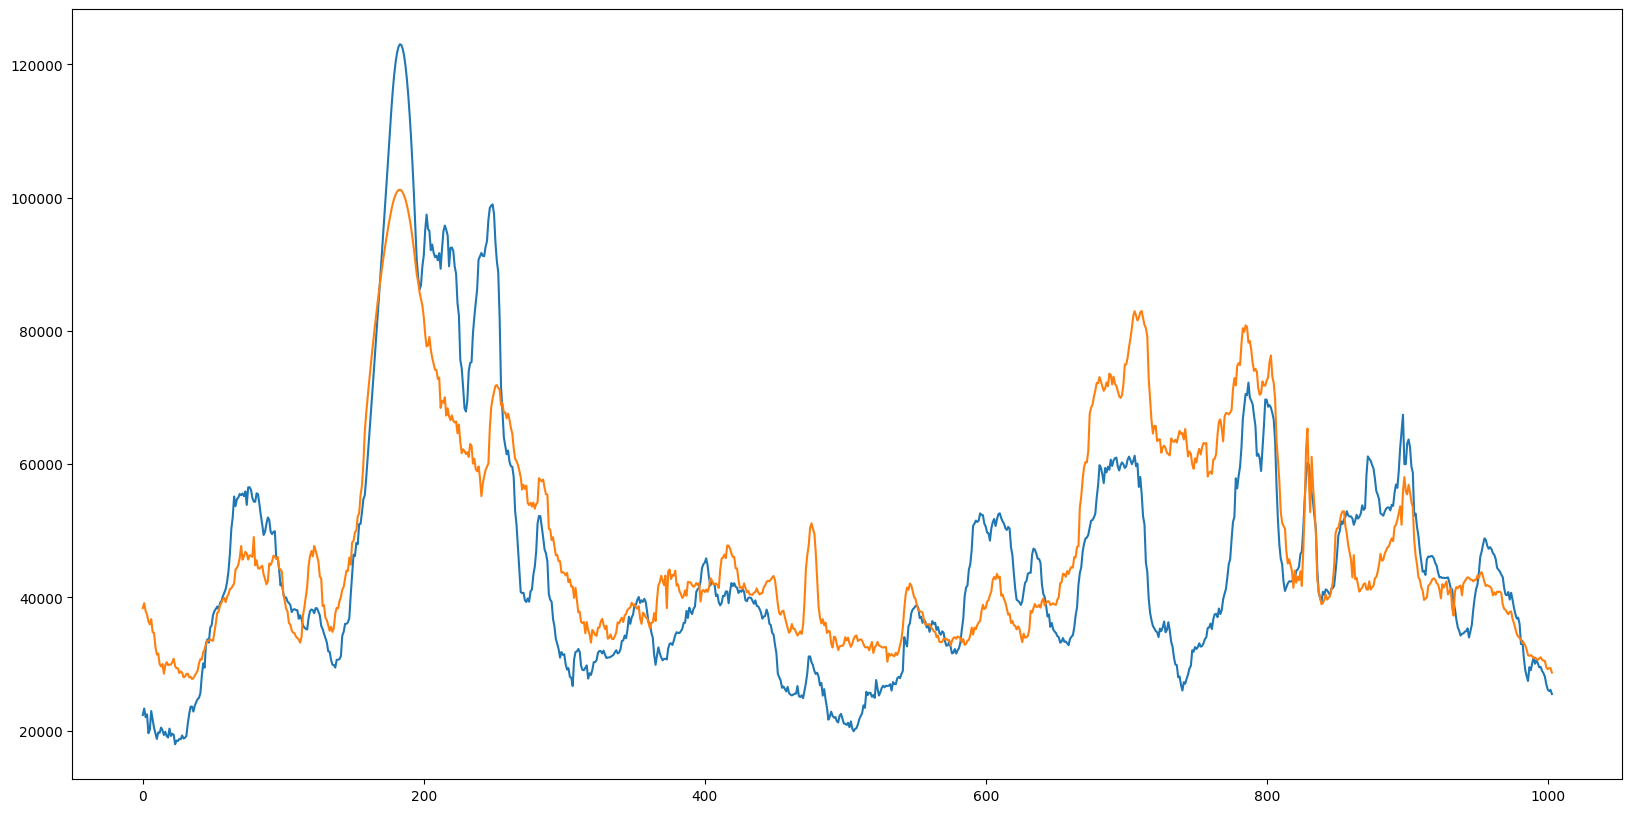

In [9]:
plt.plot(cabai_merah_keriting[['Aceh', 'Jawa Barat']])

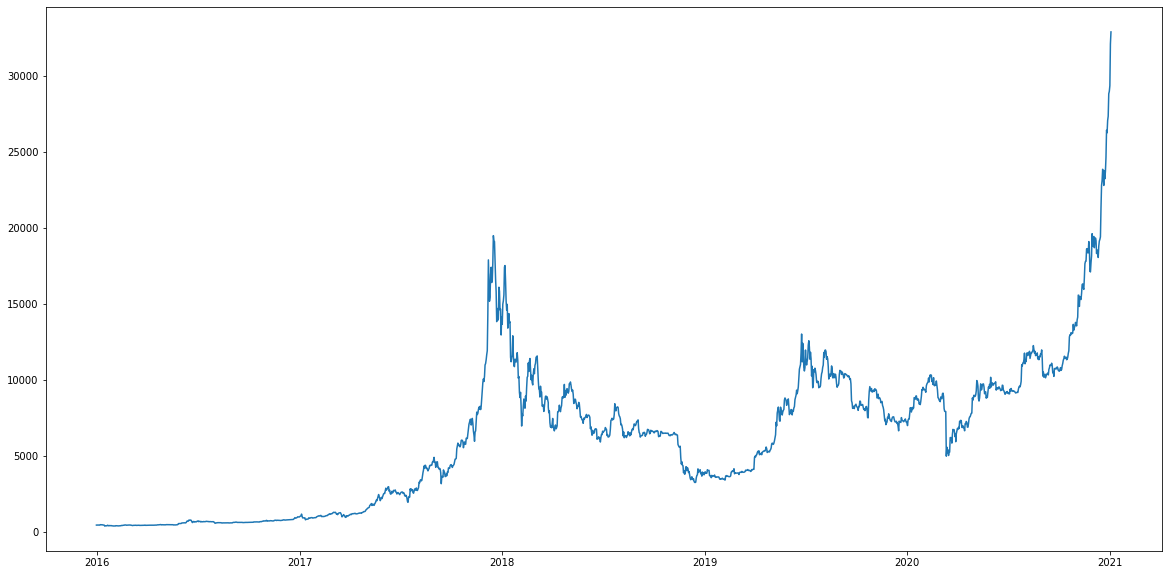

In [ ]:
plt.plot(btc['Adj Close'])

In [ ]:
print(btc['Adj Close'][0]) # wow. I would've been hella rich if I bought in haha

430.5669860839844


In [14]:
# Use for multivariate example
column_names = cabai_merah_keriting.columns
x = cabai_merah_keriting.values #returns a numpy array
# min_max_scaler = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
df = pd.DataFrame(x)
cabai_merah_keriting_df = df
cabai_merah_keriting_df.columns = column_names
# Spruce up the last column to predict next 'rate of return'
#btc_df['Adj Close'] = btc_df['Adj Close'].pct_change()
#btc_df

In [ ]:
# Used for univariate example.
returns = btc['Adj Close'].pct_change()

# Use for multivariate example
column_names = btc.columns
x = btc.values #returns a numpy array
# min_max_scaler = MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)
df = pd.DataFrame(x)
btc_df = df
btc_df.columns = column_names
# Spruce up the last column to predict next 'rate of return'
btc_df['Adj Close'] = btc_df['Adj Close'].pct_change() #feature engineering --> membuat fitur baru yakni persentase perubahan Adj Close
btc_df

,High,Low,Open,Close,Volume,Adj Close
0,432.920990,418.734985,425.875000,430.566986,4.599660e+07,NaN
1,436.246002,427.515015,430.721008,434.334015,3.627890e+07,0.008749
2,436.062012,431.869995,434.622009,433.437988,3.009660e+07,-0.002063
3,433.743011,424.705994,433.578003,430.010986,3.963380e+07,-0.007907
4,434.516998,429.084015,430.061005,433.091003,3.847750e+07,0.007163
...,...,...,...,...,...,...
1826,28937.740234,27360.089844,27360.089844,28840.953125,5.128744e+10,0.054034
1827,29244.876953,28201.992188,28841.574219,29001.720703,4.675496e+10,0.005574
1828,29600.626953,28803.585938,28994.009766,29374.152344,4.073030e+10,0.012842
1829,33155.117188,29091.181641,29376.455078,32127.267578,6.786542e+10,0.093726


# Univariate Forecasting LSTM vs GRU vs RNN

In [ ]:
returns

Date
2015-12-31         NaN
2016-01-01    0.008749
2016-01-02   -0.002063
2016-01-03   -0.007907
2016-01-04    0.007163
                ...   
2020-12-30    0.054034
2020-12-31    0.005574
2021-01-01    0.012842
2021-01-02    0.093726
2021-01-03    0.024619
Name: Adj Close, Length: 1831, dtype: float64

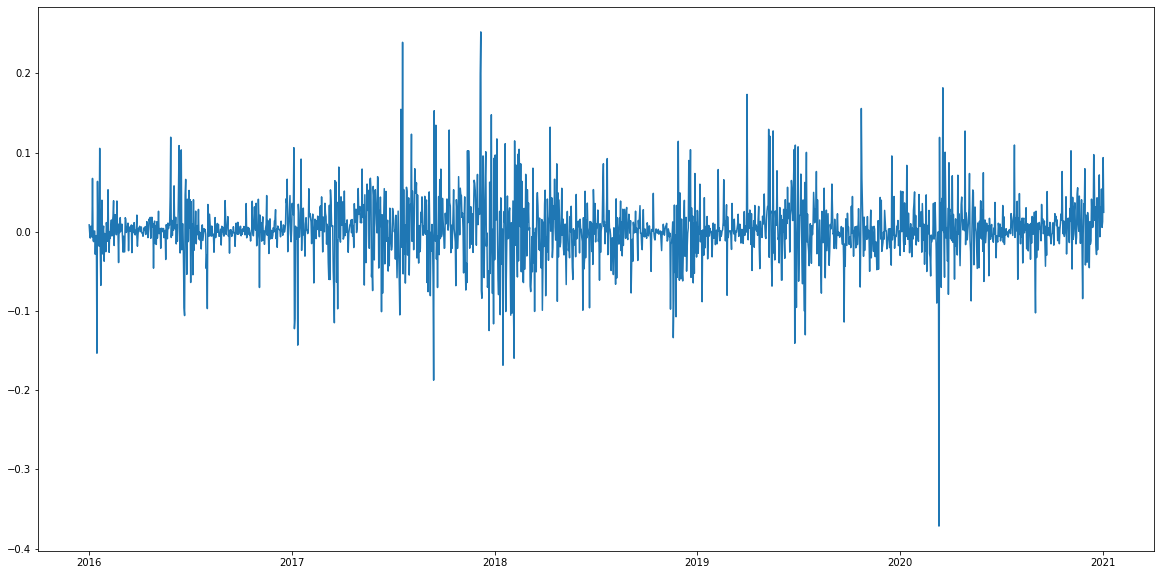

In [ ]:
plt.plot(returns)

<AxesSubplot:>

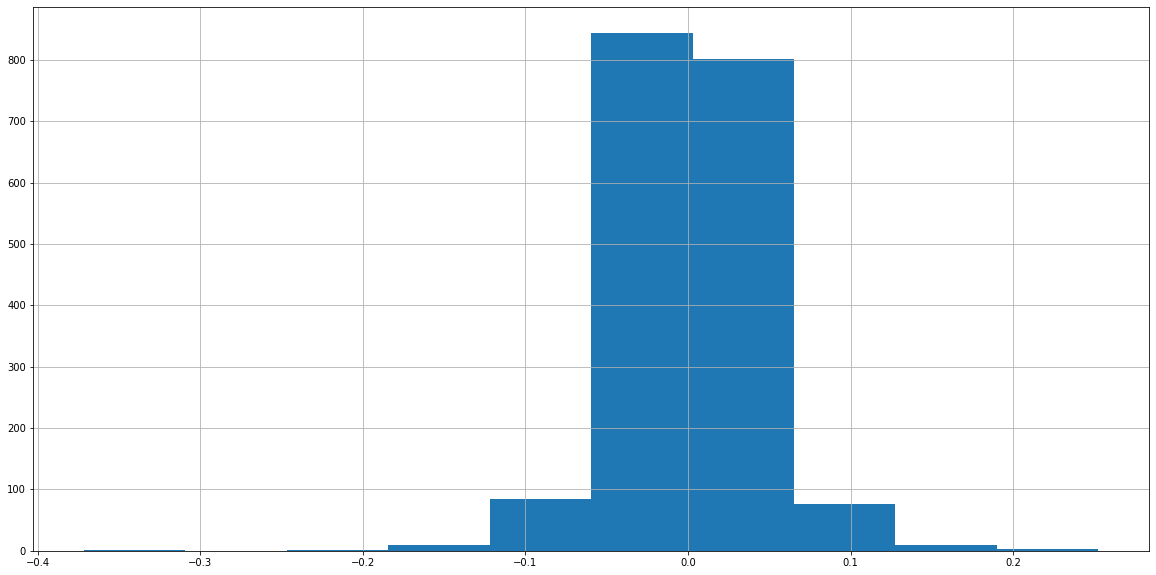

In [ ]:
returns.hist()

In [ ]:
# Flatten this matrix down.
npa = returns.values[1:].reshape(-1,1) # Python is smart to recognize whatever dimension you need by using this parameter
# Let's scale the data -- this helps avoid the exploding gradient issue
scale = MinMaxScaler(feature_range=(0,1)) # This is by default.
npa = scale.fit_transform(npa)
print(len(npa))

1830


In [ ]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 10 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array
for i in range(npa.shape[0] - samples):
    X.append(npa[i:i+samples]) # Independent Samples
    Y.append(npa[i+samples][0]) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  10 :  [array([[0.60952331],
       [0.59220104],
       [0.58283886],
       [0.60698176],
       [0.59132227],
       [0.58491714],
       [0.70356972],
       [0.57865412],
       [0.57564341],
       [0.59686638]])]
Testing Data: Length is  1 :  [0.5970691018558729]


In [ ]:
#Reshape the data so that the inputs will be acceptable to the model.
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

threshold = round(0.9 * X.shape[0])
print('Threshold is', threshold)

Dimensions of X (1820, 10, 1) Dimensions of Y (1820,)
Threshold is 1638


In [13]:
def RNN_Example():
    # Let's build the RNN
    model = keras.Sequential()

    # Add a RNN layer with 30 units.
    model.add(layers.SimpleRNN(30,
                               activation = 'tanh',
                               use_bias=True,
                               input_shape=(X.shape[1], X.shape[2])))
    # Add a dropout layer (penalizing more complex models) -- prevents overfitting
    model.add(layers.Dropout(rate=0.2))

    # Add a Dense layer with 1 units (Since we are doing a regression task.
    model.add(layers.Dense(1))

    # Evaluating loss function of MSE using the adam optimizer.
    model.compile(loss='mean_squared_error', optimizer = 'adam')

    # Print out architecture.
    model.summary()
    return model

In [14]:
def GRU_Example():
    # Let's build the GRU
    model = keras.Sequential()

    # Add a GRU layer with 30 units.
    model.add(layers.GRU(30,
                         activation = "tanh",
                         recurrent_activation = "sigmoid",
                         input_shape=(X.shape[1], X.shape[2])))
    # Add a dropout layer (penalizing more complex models) -- prevents overfitting
    model.add(layers.Dropout(rate=0.2))


    # Add a Dense layer with 1 units (Since we are doing a regression task.
    model.add(layers.Dense(1))

    # Evaluating loss function of MSE using the adam optimizer.
    model.compile(loss='mean_squared_error', optimizer = 'adam')

    # Print out architecture.
    model.summary()
    return model

In [15]:
def LSTM_Example():
    # Let's build the LSTM
    model = keras.Sequential()

    # Add a LSTM layer with 10 units.
    model.add(layers.LSTM(30,
                         activation = "tanh",
                         recurrent_activation = "sigmoid",
                         input_shape=(X.shape[1], X.shape[2])))
    # Add a dropout layer (penalizing more complex models) -- prevents overfitting
    model.add(layers.Dropout(rate=0.2))


    # Add a Dense layer with 1 units (Since we are doing a regression task.
    model.add(layers.Dense(1))

    # Evaluating loss function of MSE using the adam optimizer.
    model.compile(loss='mean_squared_error', optimizer = 'adam')

    # Print out architecture.
    model.summary()
    return model

In [23]:
# Intialize models
rnn_model = RNN_Example()
gru_model = GRU_Example()
lstm_model = LSTM_Example()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30)                  │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,111 (4.34 KB)

 Trainable params: 1,111 (4.34 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30)                  │           3,330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,361 (13.13 KB)

 Trainable params: 3,361 (13.13 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30)                  │           4,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,351 (17.00 KB)

 Trainable params: 4,351 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rnn_trained = rnn_model.fit(X[:threshold],
                            Y[:threshold],
                            shuffle = False, # Since this is time series data
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1) # Verbose outputs data

Epoch 1/100
41/41 [==============================] - 2s 24ms/step - loss: 0.0421 - val_loss: 0.0057
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 0.0048
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0046
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0048
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0050
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0045
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0049
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0046
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0043
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0044
Epoch 11

41/41 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 84/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 85/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 86/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 87/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 88/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 89/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 90/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 91/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 92/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 93/100


In [ ]:
gru_trained = gru_model.fit(X[:threshold],
                            Y[:threshold],
                            shuffle = False, # Since this is time series data
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1) # Verbose outputs data

Epoch 1/100
41/41 [==============================] - 2s 16ms/step - loss: 0.1803 - val_loss: 0.0049
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0141 - val_loss: 0.0042
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.0042
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.0042
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0042
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.0042
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.0042
Epoch 8/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 0.0042
Epoch 9/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0042
Epoch 10/100
41/41 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0042
Epoch 11

41/41 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 84/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 85/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 86/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 87/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 88/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 89/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 90/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 91/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 92/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 93/100


In [ ]:
lstm_trained = lstm_model.fit(X[:threshold],
                              Y[:threshold],
                              shuffle = False, # Since this is time series data
                              epochs=100,
                              batch_size=32,
                              validation_split=0.2,
                              verbose=1) # Verbose outputs data

Epoch 1/100
41/41 [==============================] - 2s 13ms/step - loss: 0.0444 - val_loss: 0.0051
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0043
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0044
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.0044
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.0043
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0043
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.0044
Epoch 8/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0043
Epoch 9/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0043
Epoch 10/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.0043
Epoch 11

41/41 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 84/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 85/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 86/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 87/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 88/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 89/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 90/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 91/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 92/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 93/100


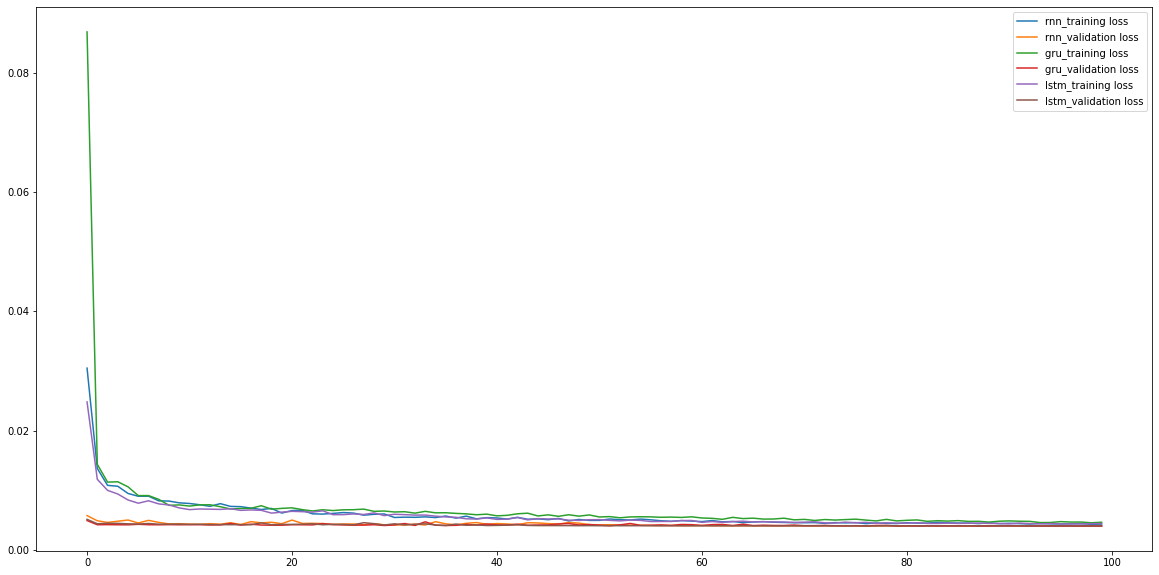

In [ ]:
# Plotting the loss iteration
plt.plot(rnn_trained.history['loss'], label = 'rnn_training loss')
plt.plot(rnn_trained.history['val_loss'], label ='rnn_validation loss')
plt.plot(gru_trained.history['loss'], label = 'gru_training loss')
plt.plot(gru_trained.history['val_loss'], label ='gru_validation loss')
plt.plot(lstm_trained.history['loss'], label = 'lstm_training loss')
plt.plot(lstm_trained.history['val_loss'], label ='lstm_validation loss')
plt.legend()
# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting (i.e model is smart enough to have mapped the entire dataset..)
# Several ways to address overfitting:
# Reduce complexity of model (hidden layers, neurons, parameters input etc)
# Add dropout and tune rate
# More data :)
# Can predict 'close' somewhere in the next time series.

# Multi-Step Forecast

In [ ]:
# Predictions using the 'sliding/rolling window approach'
# Multi step forecast.
# Using self predictions for making future predictions
print(threshold)
true_Y = Y[threshold:] # used for plotting purposes.
pred_Y_rnn = []
pred_Y_gru = []
pred_Y_lstm = []
print('Number of Forecasts to do: ',Y.shape[0] - round(Y.shape[0]*0.9))
latest_input_rnn = X[threshold-1:threshold]
latest_input_gru = X[threshold-1:threshold]
latest_input_lstm = X[threshold-1:threshold]

for i in range(Y.shape[0] - round(Y.shape[0]*0.9) ):
    # Prediction
    p_rnn = rnn_model.predict(latest_input_rnn.reshape(1,X.shape[1],1))[0,0]
    p_gru = gru_model.predict(latest_input_gru.reshape(1,X.shape[1],1))[0,0]
    p_lstm = lstm_model.predict(latest_input_lstm.reshape(1,X.shape[1],1))[0,0]

    # Update predictions
    pred_Y_rnn.append(p_rnn)
    pred_Y_gru.append(p_gru)
    pred_Y_lstm.append(p_lstm)

    # Update X input
    latest_input_rnn = np.append(X[threshold][1:], p_rnn)
    latest_input_gru = np.append(X[threshold][1:], p_gru)
    latest_input_lstm = np.append(X[threshold][1:], p_lstm)

1638
Number of Forecasts to do:  182


RNN [0.58955467, 0.5906277, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.5906233, 0.59

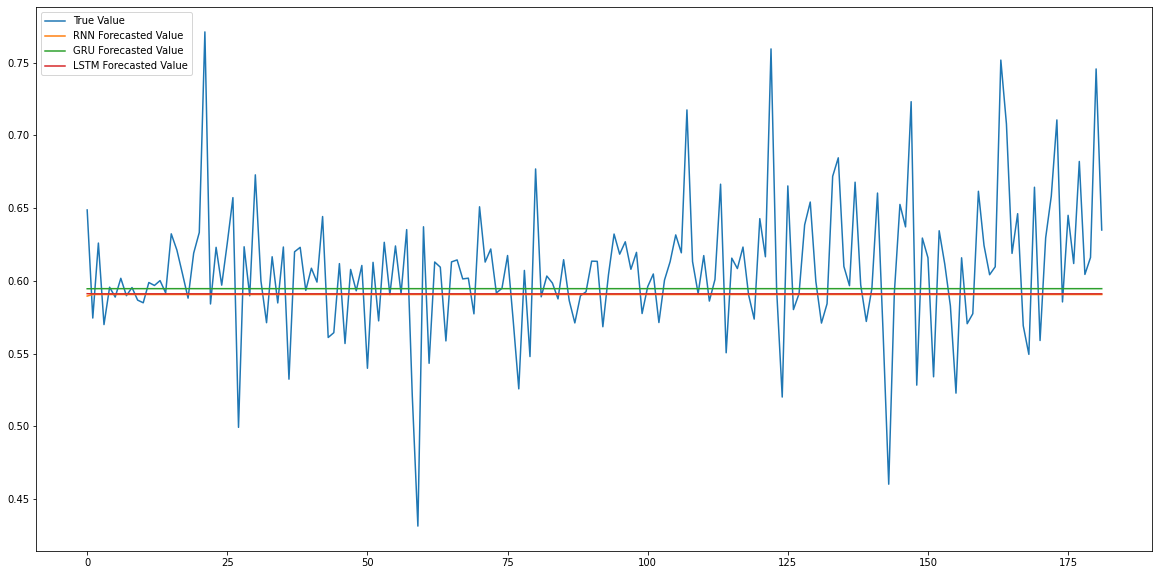

In [ ]:
plt.plot(true_Y, label = 'True Value')
plt.plot(pred_Y_rnn, label = 'RNN Forecasted Value')
plt.plot(pred_Y_gru, label = 'GRU Forecasted Value')
plt.plot(pred_Y_lstm, label = 'LSTM Forecasted Value')
plt.legend()
# Model just copied the same value over and over again. Hence, model is not very robust.
# Makes a ton of sense of time series since the most recent data is dependent on the previous observation
# Model is not that great... not really doing much.
# It's just predicting the mean.
print('RNN', pred_Y_rnn)
print('GRU', pred_Y_gru)
print('LSTM', pred_Y_lstm)

# Multi-Variate Forecasting

In [ ]:
# Using btc_df (from the prior cleaning)
btc_df

,High,Low,Open,Close,Volume,Adj Close
0,432.920990,418.734985,425.875000,430.566986,4.599660e+07,NaN
1,436.246002,427.515015,430.721008,434.334015,3.627890e+07,0.008749
2,436.062012,431.869995,434.622009,433.437988,3.009660e+07,-0.002063
3,433.743011,424.705994,433.578003,430.010986,3.963380e+07,-0.007907
4,434.516998,429.084015,430.061005,433.091003,3.847750e+07,0.007163
...,...,...,...,...,...,...
1826,28937.740234,27360.089844,27360.089844,28840.953125,5.128744e+10,0.054034
1827,29244.876953,28201.992188,28841.574219,29001.720703,4.675496e+10,0.005574
1828,29600.626953,28803.585938,28994.009766,29374.152344,4.073030e+10,0.012842
1829,33155.117188,29091.181641,29376.455078,32127.267578,6.786542e+10,0.093726


In [16]:
cabai_merah_keriting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Aceh                       1004 non-null   float64
 1   Bali                       1004 non-null   float64
 2   Banten                     1004 non-null   float64
 3   Bengkulu                   1004 non-null   float64
 4   DI Yogyakarta              1004 non-null   float64
 5   DKI Jakarta                1004 non-null   float64
 6   Gorontalo                  1004 non-null   float64
 7   Jambi                      1004 non-null   float64
 8   Jawa Barat                 1004 non-null   float64
 9   Jawa Tengah                1004 non-null   float64
 10  Jawa Timur                 1004 non-null   float64
 11  Kalimantan Barat           1004 non-null   float64
 12  Kalimantan Selatan         1004 non-null   float64
 13  Kalimantan Tengah          1004 non-null   float

In [17]:
# Kolom yang akan diambil
selected_columns = [
    "Aceh", "USDIDR Close",
    "Price Crude Oil", "Change % Crude Oil",
    "Price Natural Gas", "Change % Natural Gas",
    "Price Newcastle Coal", "Change % Newcastle Coal",
    "Price Palm Oil", "Change % Palm Oil",
    "Price US Sugar", "Change % US Sugar",
    "Price US Wheat", "Change % US Wheat"
]

#hanya ambil kolom Aceh, USDIDR Close, Price Crude Oil, Change % Crude Oil, Price Natural Gas, Change % Natural Gas, Price Newcastle Coal, Change % Newcastle Coal, Price Palm Oil, Change % Palm Oil, Price US Sugar, Change % US Sugar, Price US Wheat, Change % US Wheat
aceh_as_target = cabai_merah_keriting[selected_columns]

In [19]:
aceh_as_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aceh                     1004 non-null   float64
 1   USDIDR Close             1004 non-null   float64
 2   Price Crude Oil          1004 non-null   float64
 3   Change % Crude Oil       1004 non-null   float64
 4   Price Natural Gas        1004 non-null   float64
 5   Change % Natural Gas     1004 non-null   float64
 6   Price Newcastle Coal     1004 non-null   float64
 7   Change % Newcastle Coal  1004 non-null   float64
 8   Price Palm Oil           1004 non-null   float64
 9   Change % Palm Oil        1004 non-null   float64
 10  Price US Sugar           1004 non-null   float64
 11  Change % US Sugar        1004 non-null   float64
 12  Price US Wheat           1004 non-null   float64
 13  Change % US Wheat        1004 non-null   float64
dtypes: float64(14)
memory us

In [30]:
aceh_as_target.head()

,Aceh,USDIDR Close,Price Crude Oil,Change % Crude Oil,Price Natural Gas,Change % Natural Gas,Price Newcastle Coal,Change % Newcastle Coal,Price Palm Oil,Change % Palm Oil,Price US Sugar,Change % US Sugar,Price US Wheat,Change % US Wheat
0,22360.0,14209.39169,75.867127,-1.226089,3.995255,-27.948558,-125.386821,-436.985875,6.601437,3.357832,18.446574,0.916577,662.463126,-24.536968
1,23340.0,14190.20660,76.137177,0.199693,4.031116,-5.028045,57.687037,-156.300483,6.592109,2.630141,18.454580,0.170590,722.150195,-10.285339
2,22050.0,14215.00000,75.850000,1.300000,3.678000,3.400000,157.500000,-7.130000,5.259000,1.940000,18.740000,-0.740000,758.000000,-1.650000
3,22460.0,14283.59961,76.740000,1.170000,3.582000,-2.610000,174.100000,10.540000,5.308000,0.930000,18.750000,0.050000,770.000000,1.580000
4,19630.0,14385.50000,77.470000,0.950000,3.710000,3.570000,179.900000,3.330000,5.437000,2.430000,18.340000,-2.190000,760.750000,-1.200000


In [34]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 10 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array

for i in range(aceh_as_target.shape[0] - samples):
    X.append(aceh_as_target.iloc[i:i+samples, 1:].values)  # Ambil semua kolom kecuali target (kolom pertama)
    Y.append(aceh_as_target.iloc[i+samples, 0])  # Target dari kolom pertama (0)

X = np.array(X)
Y = np.array(Y).reshape(-1, 1)

print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  10 :  [[[ 1.42093917e+04  7.58671268e+01 -1.22608889e+00  3.99525499e+00
   -2.79485580e+01 -1.25386821e+02 -4.36985875e+02  6.60143661e+00
    3.35783209e+00  1.84465736e+01  9.16576853e-01  6.62463126e+02
   -2.45369676e+01]
  [ 1.41902066e+04  7.61371772e+01  1.99693160e-01  4.03111556e+00
   -5.02804507e+00  5.76870370e+01 -1.56300483e+02  6.59210879e+00
    2.63014064e+00  1.84545803e+01  1.70589578e-01  7.22150195e+02
   -1.02853394e+01]
  [ 1.42150000e+04  7.58500000e+01  1.30000000e+00  3.67800000e+00
    3.40000000e+00  1.57500000e+02 -7.13000000e+00  5.25900000e+00
    1.94000000e+00  1.87400000e+01 -7.40000000e-01  7.58000000e+02
   -1.65000000e+00]
  [ 1.42835996e+04  7.67400000e+01  1.17000000e+00  3.58200000e+00
   -2.61000000e+00  1.74100000e+02  1.05400000e+01  5.30800000e+00
    9.30000000e-01  1.87500000e+01  5.00000000e-02  7.70000000e+02
    1.58000000e+00]
  [ 1.43855000e+04  7.74700000e+01  9.50000000e-01  3.71000000e+00
    3.57000000e+0

In [35]:
#Reshape the data so that the inputs will be acceptable to the model.
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

Dimensions of X (994, 10, 13) Dimensions of Y (994, 1)


In [36]:
# # Get the training and testing set
threshold = round(0.9 * X.shape[0])
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY =  X[threshold:], Y[threshold:]
print('Training Length',trainX.shape, trainY.shape,'Testing Length:',testX.shape, testY.shape)

Training Length (895, 10, 13) (895, 1) Testing Length: (99, 10, 13) (99, 1)


In [44]:
trainX

array([[[ 1.42093917e+04,  7.58671268e+01, -1.22608889e+00, ...,
          9.16576853e-01,  6.62463126e+02, -2.45369676e+01],
        [ 1.41902066e+04,  7.61371772e+01,  1.99693160e-01, ...,
          1.70589578e-01,  7.22150195e+02, -1.02853394e+01],
        [ 1.42150000e+04,  7.58500000e+01,  1.30000000e+00, ...,
         -7.40000000e-01,  7.58000000e+02, -1.65000000e+00],
        ...,
        [ 1.43645220e+04,  7.86925872e+01, -5.39923554e-01, ...,
         -9.71594163e-01,  7.63536519e+02,  2.78396482e+00],
        [ 1.43332190e+04,  7.92743402e+01, -7.64175537e-01, ...,
         -6.06334802e-01,  7.59662919e+02,  2.82300045e+00],
        [ 1.43185000e+04,  7.77000000e+01, -9.40000000e-01, ...,
         -1.22000000e+00,  7.62000000e+02,  4.60000000e-01]],

       [[ 1.41902066e+04,  7.61371772e+01,  1.99693160e-01, ...,
          1.70589578e-01,  7.22150195e+02, -1.02853394e+01],
        [ 1.42150000e+04,  7.58500000e+01,  1.30000000e+00, ...,
         -7.40000000e-01,  7.58000000e

In [37]:
# Reinitialize the models
rnn_model = RNN_Example()
gru_model = GRU_Example()
lstm_model = LSTM_Example()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 30)                  │           1,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,351 (5.28 KB)

 Trainable params: 1,351 (5.28 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 30)                  │           4,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 30)                  │           5,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,311 (20.75 KB)

 Trainable params: 5,311 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Retraining the models
rnn_trained = rnn_model.fit(trainX,
                            trainY,
                            shuffle = False, # Since this is time series data
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1) # Verbose outputs data

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2735675392.0000 - val_loss: 2535106304.0000
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2735620864.0000 - val_loss: 2535044864.0000
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2735563008.0000 - val_loss: 2534982656.0000
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2735496192.0000 - val_loss: 2534919936.0000
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2735444480.0000 - val_loss: 2534856960.0000
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2735384320.0000 - val_loss: 2534793984.0000
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2735322112.0000 - val_loss: 2534731008.0000
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2735266304.0000 - val_loss: 2534667520.0000
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2735205376.0000 - val_loss: 2534604544.0000
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27351441

In [39]:
gru_trained = gru_model.fit(trainX,
                            trainY,
                            shuffle = False, # Since this is time series data
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1) # Verbose outputs data

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2735461888.0000 - val_loss: 2534898176.0000
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2735435520.0000 - val_loss: 2534860544.0000
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2735394048.0000 - val_loss: 2534822400.0000
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2735359488.0000 - val_loss: 2534783744.0000
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2735317504.0000 - val_loss: 2534745088.0000
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2735284480.0000 - val_loss: 2534707200.0000
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2735248128.0000 - val_loss: 2534668544.0000
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2735219712.0000 - val_loss: 2534629888.0000
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2735179520.0000 - val_loss: 2534591488.0000
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 273

In [40]:
lstm_trained = lstm_model.fit(trainX,
                              trainY,
                              shuffle = False, # Since this is time series data
                              epochs=100,
                              batch_size=32,
                              validation_split=0.2,
                              verbose=1) # Verbose outputs data

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2735597824.0000 - val_loss: 2535062016.0000
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2735590912.0000 - val_loss: 2535055616.0000
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2735584512.0000 - val_loss: 2535048704.0000
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2735578368.0000 - val_loss: 2535042048.0000
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2735571200.0000 - val_loss: 2535035648.0000
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2735566336.0000 - val_loss: 2535028480.0000
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2735559936.0000 - val_loss: 2535022080.0000
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2735551488.0000 - val_loss: 2535015424.0000
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2735547904.0000 - val_loss: 2535008768.0000
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27355402

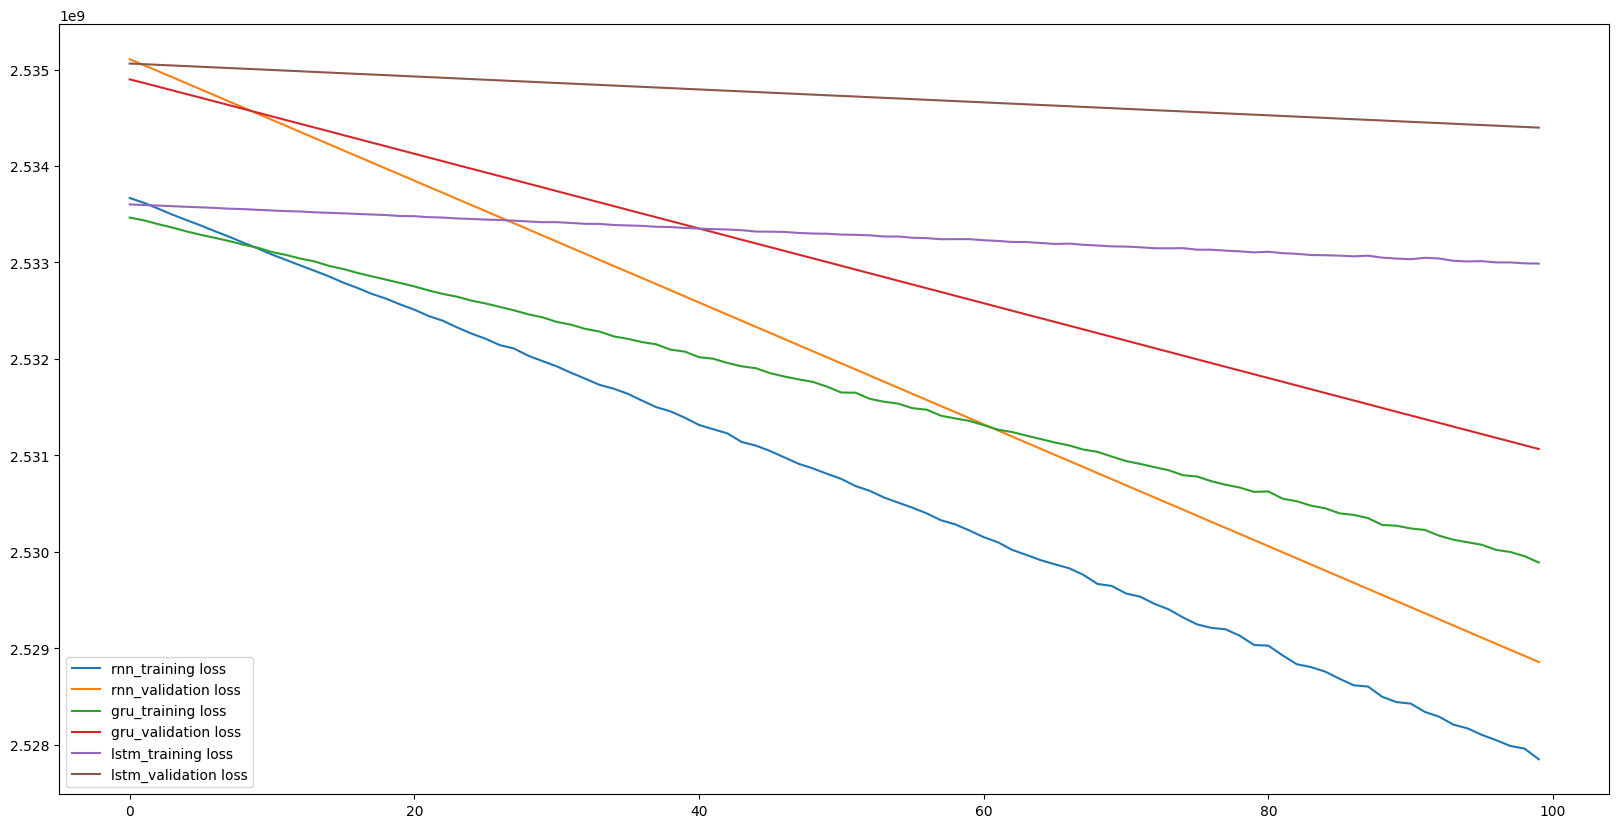

In [41]:
# Plotting the loss iteration
plt.plot(rnn_trained.history['loss'], label = 'rnn_training loss')
plt.plot(rnn_trained.history['val_loss'], label ='rnn_validation loss')
plt.plot(gru_trained.history['loss'], label = 'gru_training loss')
plt.plot(gru_trained.history['val_loss'], label ='gru_validation loss')
plt.plot(lstm_trained.history['loss'], label = 'lstm_training loss')
plt.plot(lstm_trained.history['val_loss'], label ='lstm_validation loss')
plt.legend()
# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting (i.e model is smart enough to have mapped the entire dataset..)
# Several ways to address overfitting:
# Reduce complexity of model (hidden layers, neurons, parameters input etc)
# Add dropout and tune rate
# More data :)
# Can predict 'close' somewhere in the next time series.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


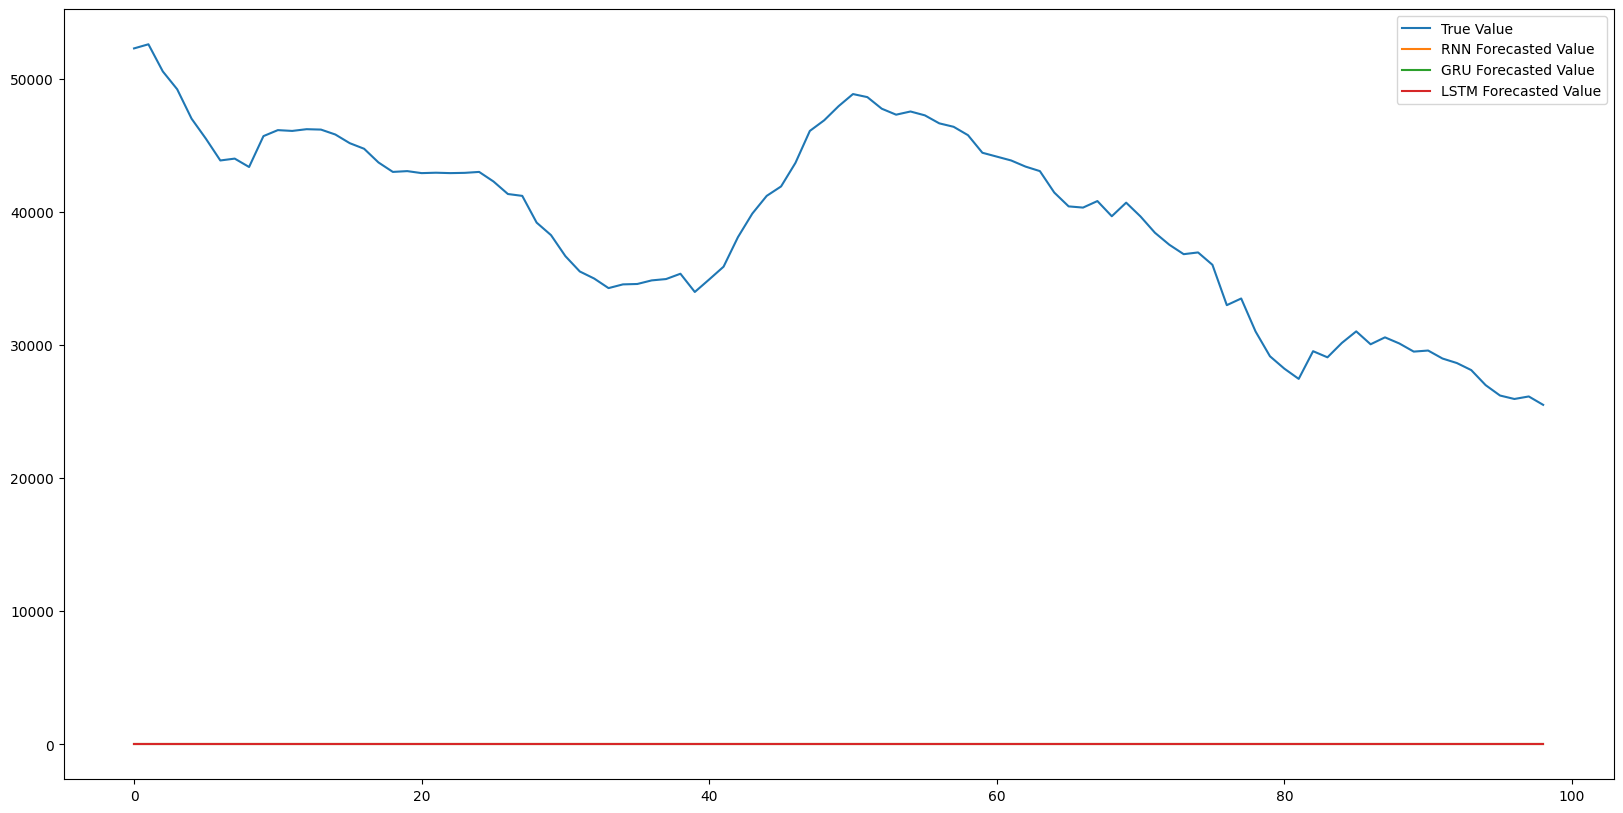

In [42]:
# This is a one step forecast (based on how we constructed our model)
y_pred_rnn = rnn_model.predict(testX)
y_pred_gru = gru_model.predict(testX)
y_pred_lstm = lstm_model.predict(testX)
plt.plot(testY, label = 'True Value')
plt.plot(y_pred_rnn, label = 'RNN Forecasted Value')
plt.plot(y_pred_gru, label = 'GRU Forecasted Value')
plt.plot(y_pred_lstm, label = 'LSTM Forecasted Value')
plt.legend()

In [ ]:
# Don't be deceived by this plot that I will create here!
btc = web.get_data_yahoo(tick,'12/31/2015',interval='d')
column_names = btc.columns
x = btc.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
btc_scaled = df
btc_scaled.columns = column_names
btc_scaled

,High,Low,Open,Close,Volume,Adj Close
0,0.001696,0.002013,0.001878,0.002034,0.000211,0.002034
1,0.001794,0.002290,0.002028,0.002150,0.000094,0.002150
2,0.001788,0.002428,0.002148,0.002122,0.000019,0.002122
3,0.001720,0.002202,0.002116,0.002017,0.000134,0.002017
4,0.001743,0.002340,0.002007,0.002112,0.000120,0.002112
...,...,...,...,...,...,...
1826,0.835761,0.851871,0.833786,0.874551,0.617890,0.874551
1827,0.844748,0.878429,0.879544,0.879489,0.563254,0.879489
1828,0.855158,0.897406,0.884253,0.890926,0.490631,0.890926
1829,0.959164,0.906478,0.896065,0.975478,0.817726,0.975478


In [ ]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 10 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array
for i in range(btc_scaled.shape[0] - samples):
    X.append(btc_scaled.iloc[i:i+samples, 0:5].values) # Independent Samples
    Y.append(btc_scaled.iloc[i+samples, 5:].values) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  10 :  [array([[1.69625966e-03, 2.01321649e-03, 1.87797168e-03, 2.03418679e-03,
        2.10740348e-04],
       [1.79355117e-03, 2.29018025e-03, 2.02764876e-03, 2.14987676e-03,
        9.36003641e-05],
       [1.78816752e-03, 2.42755699e-03, 2.14813771e-03, 2.12235871e-03,
        1.90771209e-05],
       [1.72031242e-03, 2.20157041e-03, 2.11589183e-03, 2.01711137e-03,
        1.34041305e-04],
       [1.74295965e-03, 2.33967396e-03, 2.00726344e-03, 2.11170239e-03,
        1.20102928e-04],
       [1.73315764e-03, 2.35834781e-03, 2.10017043e-03, 2.07696765e-03,
        7.24294128e-05],
       [1.66509716e-03, 2.25314637e-03, 2.06270450e-03, 1.98928778e-03,
        6.66421477e-05],
       [2.45249725e-03, 2.33945254e-03, 2.00571854e-03, 2.87816182e-03,
        7.11784185e-04],
       [2.57445499e-03, 2.93441769e-03, 2.85593630e-03, 2.73019547e-03,
        3.43294153e-04],
       [2.33176913e-03, 2.90132786e-03, 2.72760220e-03, 2.55762867e-03,
        4.53723513e-05

In [ ]:
#Reshape the data so that the inputs will be acceptable to the model.
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

Dimensions of X (1821, 10, 5) Dimensions of Y (1821, 1)


In [ ]:
# # Get the training and testing set
threshold = round(0.9 * X.shape[0])
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY =  X[threshold:], Y[threshold:]
print('Training Length',trainX.shape, trainY.shape,'Testing Length:',testX.shape, testY.shape)

Training Length (1639, 10, 5) (1639, 1) Testing Length: (182, 10, 5) (182, 1)


In [ ]:
# Reinitialize the models
rnn_model = RNN_Example()
gru_model = GRU_Example()
lstm_model = LSTM_Example()
# Retraining the models
rnn_trained = rnn_model.fit(trainX,
                            trainY,
                            shuffle = False, # Since this is time series data
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1) # Verbose outputs data
gru_trained = gru_model.fit(trainX,
                            trainY,
                            shuffle = False, # Since this is time series data
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1) # Verbose outputs data
lstm_trained = lstm_model.fit(trainX,
                              trainY,
                              shuffle = False, # Since this is time series data
                              epochs=100,
                              batch_size=32,
                              validation_split=0.2,
                              verbose=1) # Verbose outputs data

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 30)                1080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 1,111
Trainable params: 1,111
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 30)                3330      
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)                0         
______________________________

41/41 [==============================] - 0s 4ms/step - loss: 2.9726e-04 - val_loss: 4.4235e-04
Epoch 34/100
41/41 [==============================] - 0s 4ms/step - loss: 2.3322e-04 - val_loss: 4.6778e-04
Epoch 35/100
41/41 [==============================] - 0s 4ms/step - loss: 2.2587e-04 - val_loss: 4.2386e-04
Epoch 36/100
41/41 [==============================] - 0s 5ms/step - loss: 3.0347e-04 - val_loss: 4.1448e-04
Epoch 37/100
41/41 [==============================] - 0s 4ms/step - loss: 2.1388e-04 - val_loss: 4.1997e-04
Epoch 38/100
41/41 [==============================] - 0s 4ms/step - loss: 2.7055e-04 - val_loss: 3.8474e-04
Epoch 39/100
41/41 [==============================] - 0s 4ms/step - loss: 1.7945e-04 - val_loss: 4.1604e-04
Epoch 40/100
41/41 [==============================] - 0s 4ms/step - loss: 2.5373e-04 - val_loss: 4.2420e-04
Epoch 41/100
41/41 [==============================] - 0s 4ms/step - loss: 1.8655e-04 - val_loss: 4.2874e-04
Epoch 42/100
41/41 [=====================

Epoch 85/100
41/41 [==============================] - 0s 4ms/step - loss: 2.2928e-04 - val_loss: 1.6036e-04
Epoch 86/100
41/41 [==============================] - 0s 4ms/step - loss: 2.0310e-04 - val_loss: 1.7703e-04
Epoch 87/100
41/41 [==============================] - 0s 4ms/step - loss: 1.8356e-04 - val_loss: 1.6450e-04
Epoch 88/100
41/41 [==============================] - 0s 4ms/step - loss: 2.0439e-04 - val_loss: 1.6558e-04
Epoch 89/100
41/41 [==============================] - 0s 4ms/step - loss: 1.6990e-04 - val_loss: 1.6105e-04
Epoch 90/100
41/41 [==============================] - 0s 4ms/step - loss: 1.8145e-04 - val_loss: 1.7289e-04
Epoch 91/100
41/41 [==============================] - 0s 4ms/step - loss: 1.8338e-04 - val_loss: 1.8676e-04
Epoch 92/100
41/41 [==============================] - 0s 4ms/step - loss: 1.8182e-04 - val_loss: 1.8308e-04
Epoch 93/100
41/41 [==============================] - 0s 4ms/step - loss: 2.0112e-04 - val_loss: 2.0424e-04
Epoch 94/100
41/41 [========

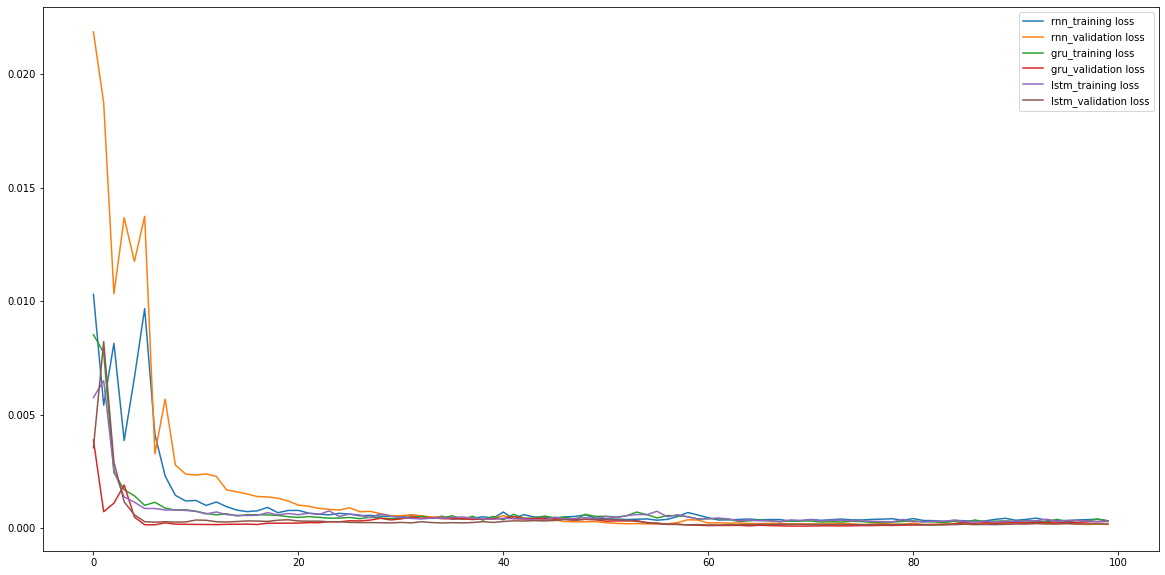

In [ ]:
# Plotting the loss iteration
plt.plot(rnn_trained.history['loss'], label = 'rnn_training loss')
plt.plot(rnn_trained.history['val_loss'], label ='rnn_validation loss')
plt.plot(gru_trained.history['loss'], label = 'gru_training loss')
plt.plot(gru_trained.history['val_loss'], label ='gru_validation loss')
plt.plot(lstm_trained.history['loss'], label = 'lstm_training loss')
plt.plot(lstm_trained.history['val_loss'], label ='lstm_validation loss')
plt.legend()
# Note:
# if training loss >> validation loss -> Underfitting
# if training loss << validation loss -> Overfitting (i.e model is smart enough to have mapped the entire dataset..)
# Several ways to address overfitting:
# Reduce complexity of model (hidden layers, neurons, parameters input etc)
# Add dropout and tune rate
# More data :)
# Can predict 'close' somewhere in the next time series.

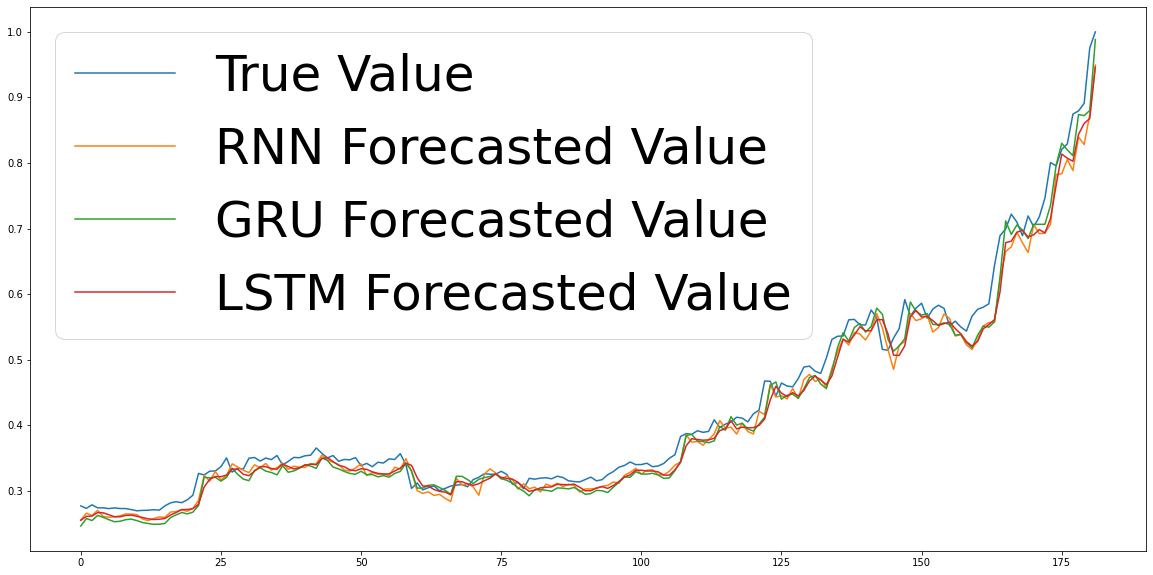

In [ ]:
# This is a one step forecast (based on how we constructed our model)
y_pred_rnn = rnn_model.predict(testX)
y_pred_gru = gru_model.predict(testX)
y_pred_lstm = lstm_model.predict(testX)
plt.plot(testY, label = 'True Value')
plt.plot(y_pred_rnn, label = 'RNN Forecasted Value')
plt.plot(y_pred_gru, label = 'GRU Forecasted Value')
plt.plot(y_pred_lstm, label = 'LSTM Forecasted Value')
plt.legend(fontsize=50)
# plt.legend()

In [ ]:
rnn_model.get_weights()

[array([[ 0.05413565,  0.05179131,  0.05089777,  0.28138912,  0.3355662 ,
         -0.2628196 ,  0.13391022,  0.03019162,  0.2311035 ,  0.01066415,
          0.38281286,  0.2667898 ,  0.29233176, -0.08754133, -0.34676003,
          0.14523223,  0.32101724, -0.20938562,  0.30176792, -0.06615949,
          0.338696  , -0.18901007,  0.12468252, -0.33424175, -0.15765308,
          0.00330863, -0.10060425,  0.37529412, -0.36689383,  0.20293368],
        [ 0.06678943,  0.07542956,  0.11145053,  0.30666548, -0.18048017,
          0.3897153 , -0.12880766,  0.14835694, -0.03944907, -0.40162116,
         -0.31822634, -0.10645454, -0.11700929, -0.33694047, -0.3375114 ,
          0.3542082 , -0.18072452, -0.38826272, -0.07378162, -0.32454777,
          0.03285588,  0.1277599 , -0.31926712, -0.31940895, -0.26795208,
          0.1881217 ,  0.06737895, -0.10917184, -0.3243166 , -0.07895191],
        [ 0.10673006, -0.07323437,  0.24071059, -0.2893505 , -0.03343771,
         -0.22917742, -0.31098682,  

In [ ]:
gru_model.get_weights()

[array([[-0.48459974,  0.29924804,  0.08974588, -0.74373955, -0.10607919,
         -0.27812737,  0.16927063, -0.11466715, -0.5666831 ,  0.12134933,
         -0.2526899 ,  0.05104671,  0.38734347,  0.42424345, -0.39569673,
         -0.07126996, -0.12493648, -0.35897717,  0.4539288 , -0.4491734 ,
         -0.6441773 , -0.39731553, -0.17965993, -0.24586415, -0.18637222,
          0.43870118, -0.01425467,  0.11155785, -0.6377806 , -0.09080627,
         -0.12614147, -0.04090158, -0.1880632 , -0.12983607,  0.15027201,
          0.02746446,  0.10378395, -0.19736604, -0.11985037, -0.15869376,
         -0.1411363 ,  0.202225  ,  0.03103113,  0.07725082, -0.043552  ,
         -0.00803309,  0.15046442,  0.21183777,  0.23032372,  0.13634756,
         -0.10054293, -0.15207395,  0.06924793, -0.06804597, -0.07634   ,
          0.10515462, -0.09552728,  0.09680188,  0.0568668 , -0.34559095,
         -0.03085763, -0.03199366,  0.00700175,  0.02686577, -0.19565047,
          0.24345961, -0.07903139,  0.

In [ ]:
lstm_model.get_weights()

[array([[-1.60129026e-01, -8.61848220e-02, -8.30406472e-02,
         -8.29092506e-03,  8.74241143e-02,  6.09269142e-02,
          2.85230398e-01, -1.53667033e-01,  9.58941504e-02,
          9.85503569e-02,  1.44088659e-02,  1.26284482e-02,
         -1.31958723e-01,  1.74904302e-01,  3.15976322e-01,
          1.58135459e-01,  1.97603598e-01, -6.47577271e-02,
         -1.52049810e-01, -2.44197547e-02, -7.54070356e-02,
          5.61500713e-02,  1.07734278e-01, -3.45431245e-03,
          1.94275722e-01, -1.37882650e-01,  2.58845329e-01,
          1.78417802e-01,  8.31803530e-02,  3.54054570e-02,
          1.97819337e-01,  1.93228185e-01,  2.08020046e-01,
          1.89105775e-02, -1.49948418e-01,  5.85325807e-02,
         -2.25423574e-02, -4.17238399e-02, -7.24729011e-03,
         -1.17134586e-01, -1.38504013e-01,  1.46512166e-01,
         -1.79873213e-01,  1.97901338e-01, -2.29651138e-01,
         -1.42933860e-01,  1.04311258e-01,  1.83249682e-01,
         -8.96427035e-02,  1.55005708e-0

In [ ]:
# Let's save the model weights and use this again in a different notebook...
# RNN
rnn_model.save('rnn_btc.h5')
# GRU
gru_model.save('gru_btc.h5')
# LSTM
lstm_model.save('lstm_btc.h5')